In [0]:
import tensorflow as tf

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [0]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name = "X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [0]:
def neuron_layer(X, n_neurons, name,activation=None):
  with tf.name_scope(name):
    n_inputs = int(X.get_shape()[1])
    stddev = 2/ np.sqrt(n_inputs)
    init = tf.truncated_normal((n_inputs, n_neurons),stddev=stddev)
    W = tf.Variable(init, name="weights")
    b = tf.Variable(tf.zeros([n_neurons]), name="biases")
    z = tf.matmul(X, W)+b
    if activation=="relu":
      return tf.nn.relu(z)
    else:
      return z
      

In [0]:
from tensorflow.contrib.layers import fully_connected

with tf.name_scope("dnn"):
  hiddeni1 = fully_connected(X,n_hidden1,scope="hiddeni1")
  hiddeni2 = fully_connected(hiddeni1,n_hidden2,scope="hiddeni2")
  logits = fully_connected(hiddeni2,n_outputs,scope="outputs",activation_fn=None)

In [0]:
with tf.name_scope("loss"):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
  loss = tf.reduce_mean(xentropy, name="loss")

In [0]:
learning_rate = 0.01
with tf.name_scope("train"):
  optimizer = tf.train.GradientDescentOptimizer(learning_rate)
  training_op = optimizer.minimize(loss)

In [0]:
with tf.name_scope("eval"):
  correct = tf.nn.in_top_k(logits, y ,1)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("tmp/data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
n_epochs = 50
batch_size = 50

In [0]:
with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y:y_batch})

    acc_train = accuracy.eval(feed_dict={X:X_batch,y:y_batch})
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images,y: mnist.test.labels})
    print(epoch, "Training accuracy:",acc_train,"Test accuracy:",acc_test)
  save_path = saver.save(sess, "my_model.ckpt")

0 Training accuracy: 0.88 Test accuracy: 0.9009
1 Training accuracy: 1.0 Test accuracy: 0.9181
2 Training accuracy: 0.98 Test accuracy: 0.9267
3 Training accuracy: 0.98 Test accuracy: 0.9331
4 Training accuracy: 0.94 Test accuracy: 0.9386
5 Training accuracy: 0.98 Test accuracy: 0.9417
6 Training accuracy: 0.98 Test accuracy: 0.9487
7 Training accuracy: 0.94 Test accuracy: 0.9519
8 Training accuracy: 1.0 Test accuracy: 0.955
9 Training accuracy: 0.96 Test accuracy: 0.9569
10 Training accuracy: 1.0 Test accuracy: 0.9592
11 Training accuracy: 1.0 Test accuracy: 0.9614
12 Training accuracy: 1.0 Test accuracy: 0.9623
13 Training accuracy: 0.98 Test accuracy: 0.965
14 Training accuracy: 0.94 Test accuracy: 0.9657
15 Training accuracy: 1.0 Test accuracy: 0.9673
16 Training accuracy: 0.98 Test accuracy: 0.9688
17 Training accuracy: 0.96 Test accuracy: 0.9687
18 Training accuracy: 0.96 Test accuracy: 0.9697
19 Training accuracy: 1.0 Test accuracy: 0.9719
20 Training accuracy: 1.0 Test accuracy

In [0]:
with tf.Session() as sess:
  saver.restore(sess, tf.train.latest_checkpoint('./'))
  # first_image = mnist.test.next_batch(1)

  # first_image = np.array(first_image, dtype='uint8')
  # pixels = first_image.reshape((28, 28))
  X_new_scaled = mnist.test.images # some new images (scaled from 0 to 1)
  Z = logits.eval(feed_dict={X: X_new_scaled})
  y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model.ckpt


In [0]:
y_pred[4]

3

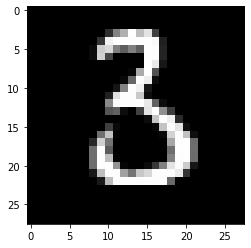

In [0]:
import matplotlib.pyplot as plt
import numpy as np
amount = 20
image = np.zeros((amount, 28, 28))
image[0] = mnist.test.images[4].reshape(28, 28)
plt.imshow(image[0], cmap='gray')